# Search Algorithms on RouteProblem

This script demonstrates running search algorithms on a `RouteProblem` and visualizing the results. It uses the definitions from:

- **functions.py**  
  (which includes `Problem`, `Node`, `expand`, `path_states`, and other required functions plotting)
- **maps.py**  
  (which provides the map definitions, e.g., `romania_map`)

  **You will NOT need to edit any of those.**

The script runs:

- **Breadth-First Search**
- **A\* Search**

For each algorithm, it prints the solution path and total cost, and then plots the map with:

- All edges (with cost labels)
- All nodes
- Expanded nodes (marked in cyan)
- The final solution path (drawn as a red line with the start and goal marked as stars)


In [1]:
#DON'T EDIT
import heapq
from collections import deque
import math
from functions import *
from maps import *
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
#DON'T EDIT
# Defines a RouteProblem.
# The RouteProblem class inherits from the Problem class.
class RouteProblem(Problem):
    def __init__(self, initial, goal, map):
        super().__init__(initial, goal)
        self.map = map

    def actions(self, state):
        # Return a list of (neighbor, cost) tuples.
        return [(neighbor, cost) for neighbor, cost in self.map[state].items()]

    def result(self, state, action):
        # Action is a (neighbor, cost) tuple; return the neighbor.
        return action[0]

    def action_cost(self, s, action, s1):
        return action[1]

    def h(self, state):
        # Use Euclidean distance as the heuristic.
        if state not in self.map.locations or self.goal not in self.map.locations:
            return 0
        pos1 = self.map.locations[state]
        pos2 = self.map.locations[self.goal]
        return euclidean_distance(pos1, pos2)


def euclidean_distance(pos1, pos2):
    """Return the Euclidean distance between two positions."""
    return math.hypot(pos2[0] - pos1[0], pos2[1] - pos1[1])

# Lets look at the individual search algorithm functions!
## This is the block where you will work.

In the following cell, you will work to implement:
- **Depth First Search (DFS)**
- **Uniform Cost Search**
- **Greedy Best First Search**

In [3]:

# Cell ID 1
# You Have Work To Do Here
""" 
# Search Algorithms
Each of the algorithms takes a Route Problem as input and Outputs: 
(1) the goal node (in it finds no solution, None)
(2) and a list of expanded nodes.
"""
def bfs(problem):
    """Breadth-first search (using a FIFO)."""
    node = Node(problem.initial)
    if problem.is_goal(node.state):
        return node
    frontier = deque([node])
    explored = {node.state}
    expanded = []
    while frontier:
        node = frontier.popleft()
        expanded.append(node.state)
        if problem.is_goal(node.state):
            return node, expanded
        for child in expand(problem, node):
            if child.state not in explored:
                explored.add(child.state)
                frontier.append(child)
    return None, expanded


def dfs(problem):
    """Depth-first search (using a LIFO stack).
    It should return:
        (1) the goal node (in it finds no solution, None)
        (2) and a list of expanded nodes.
    HINT:
    You can implement it in the same way as BFS -- just using LIFO.
    """
    node = Node(problem.initial)
    if problem.is_goal(node.state):
        return node
    frontier = [node]  # Change 1: Use a list for LIFO 
    explored = {node.state}
    expanded = []
    while frontier:
        node = frontier.pop()  # Change 2: Use pop() first item
        expanded.append(node.state)
        if problem.is_goal(node.state):
            return node, expanded
        for child in expand(problem, node):
            if child.state not in explored:
                explored.add(child.state)
                frontier.append(child)
    return None, expanded


def astar_search(problem):
    """A* search with f(n) = g(n) + h(n)."""

    node = Node(problem.initial)
    frontier = [(node.path_cost + problem.h(node.state), node)]
    expanded = []
    while frontier:
        f, node = heapq.heappop(frontier)
        expanded.append(node.state)
        if problem.is_goal(node.state):
            return node, expanded
        for child in expand(problem, node):
            heapq.heappush(frontier, (child.path_cost + problem.h(child.state), child))
    return None, expanded


def uniform_cost_search(problem):
    """uniform cost search. f(n) = g(n)
        It should return:
        (1) the goal node (in it finds no solution, None)
        (2) and a list of expanded nodes.
    HINT: 
    (1) should be similar to astar search. Only difference would be the cost f(n)
    (2) node.path_cost --> cost to come to the node from the start point (i.e., g(n))
    """
    node = Node(problem.initial)
    frontier = [(node.path_cost, node)]  #only g(n), no heuristic
    expanded = []
    while frontier:
        f, node = heapq.heappop(frontier)
        expanded.append(node.state)
        if problem.is_goal(node.state):
            return node, expanded
        for child in expand(problem, node):
            heapq.heappush(frontier, (child.path_cost, child)) #also only g(n)
    return None, expanded

def greedy_best_first_search(problem):
    """Greedy Best First Search. f(n) = h(n)
        It should return:
        (1) the goal node (in it finds no solution, None)
        (2) and a list of expanded nodes.
    HINT: 
    (1) Should be similar to astar search. Only difference would be the cost f(n)
    (2) problem.h(node.state) --> heuristic value to reach goal from that state (i.e., h(n))
    """
    node = Node(problem.initial)
    frontier = [(problem.h(node.state), node)]  #only h(n)
    expanded = []
    while frontier:
        f, node = heapq.heappop(frontier)
        expanded.append(node.state)
        if problem.is_goal(node.state):
            return node, expanded
        for child in expand(problem, node):
            heapq.heappush(frontier, (problem.h(child.state), child))  #also only h(n)
    return None, expanded

def weighted_astar_search(problem):
    """A* search with f(n) = g(n) + h(n)."""
    CONST = 1.5
    node = Node(problem.initial)
    frontier = [(node.path_cost + CONST* problem.h(node.state), node)]
    expanded = []
    while frontier:
        f, node = heapq.heappop(frontier)
        expanded.append(node.state)
        if problem.is_goal(node.state):
            return node, expanded
        for child in expand(problem, node):
            heapq.heappush(frontier, (child.path_cost + CONST * problem.h(child.state), child))
    return None, expanded

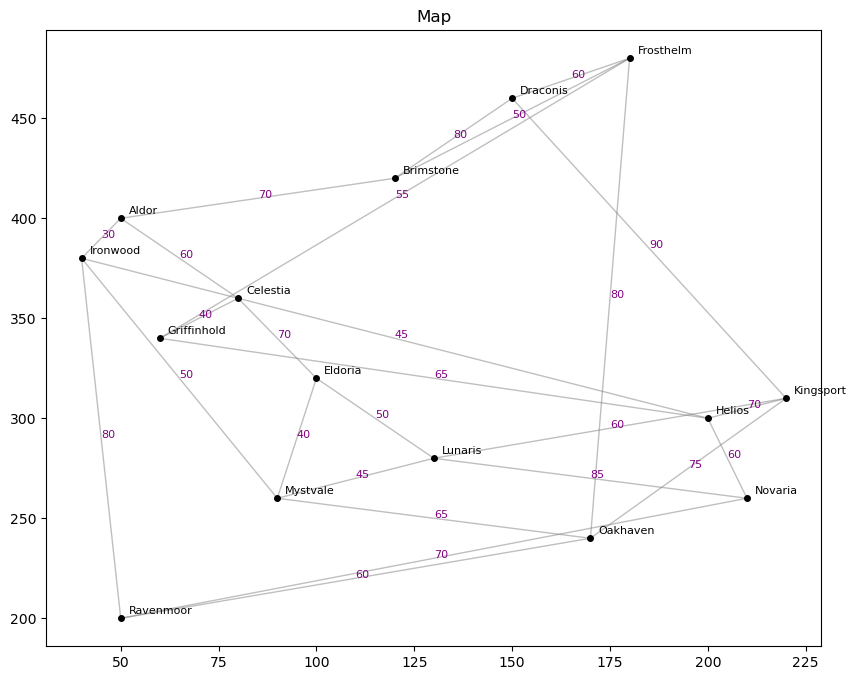

In [11]:
#Cell ID 2
""" 
There are two available maps in the maps.py file. Both are already imported to this notebook.
(1) romania_map
(2) fantasy_map
"""
#plot_map(romania_map)
plot_map(fantasy_map)

In [10]:
#romania_map
fantasy_map

{'Aldor': {'Brimstone': 70, 'Celestia': 60, 'Ironwood': 30},
 'Brimstone': {'Draconis': 80, 'Frosthelm': 50, 'Aldor': 70},
 'Celestia': {'Eldoria': 70, 'Griffinhold': 40, 'Aldor': 60},
 'Draconis': {'Frosthelm': 60, 'Kingsport': 90, 'Brimstone': 80},
 'Eldoria': {'Lunaris': 50, 'Mystvale': 40, 'Celestia': 70},
 'Frosthelm': {'Griffinhold': 55,
  'Oakhaven': 80,
  'Brimstone': 50,
  'Draconis': 60},
 'Griffinhold': {'Helios': 65, 'Celestia': 40, 'Frosthelm': 55},
 'Helios': {'Ironwood': 45, 'Kingsport': 70, 'Novaria': 60, 'Griffinhold': 65},
 'Ironwood': {'Mystvale': 50, 'Ravenmoor': 80, 'Aldor': 30, 'Helios': 45},
 'Kingsport': {'Lunaris': 60, 'Oakhaven': 75, 'Draconis': 90, 'Helios': 70},
 'Lunaris': {'Mystvale': 45, 'Novaria': 85, 'Eldoria': 50, 'Kingsport': 60},
 'Mystvale': {'Oakhaven': 65, 'Eldoria': 40, 'Ironwood': 50, 'Lunaris': 45},
 'Novaria': {'Ravenmoor': 70, 'Helios': 60, 'Lunaris': 85},
 'Oakhaven': {'Ravenmoor': 60,
  'Frosthelm': 80,
  'Kingsport': 75,
  'Mystvale': 65},


Breadth-First Search:
Path: Frosthelm -> Griffinhold -> Helios -> Ironwood
Total cost: 165


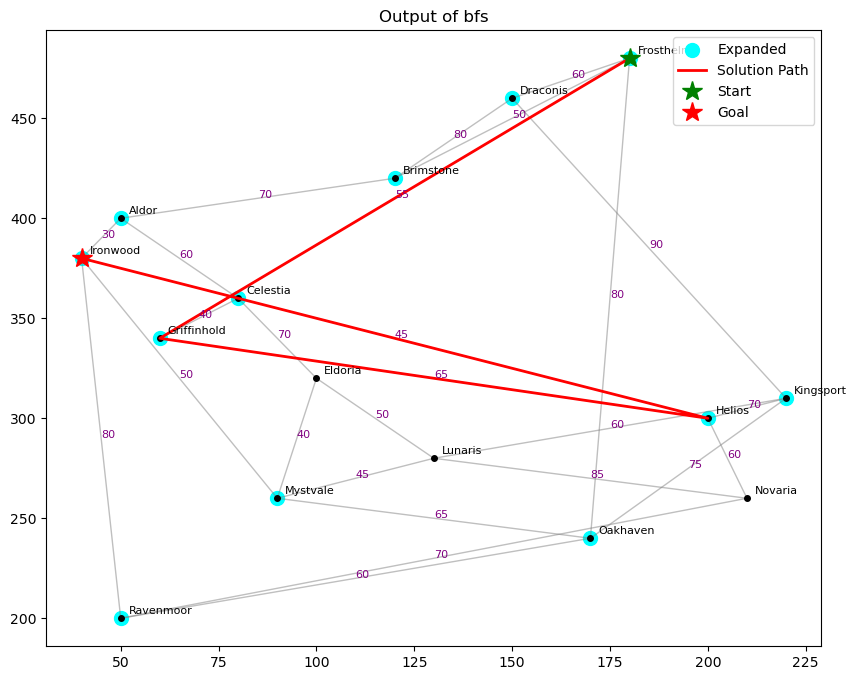


Depth-First Search:
Path: Frosthelm -> Draconis -> Kingsport -> Helios -> Ironwood
Total cost: 265


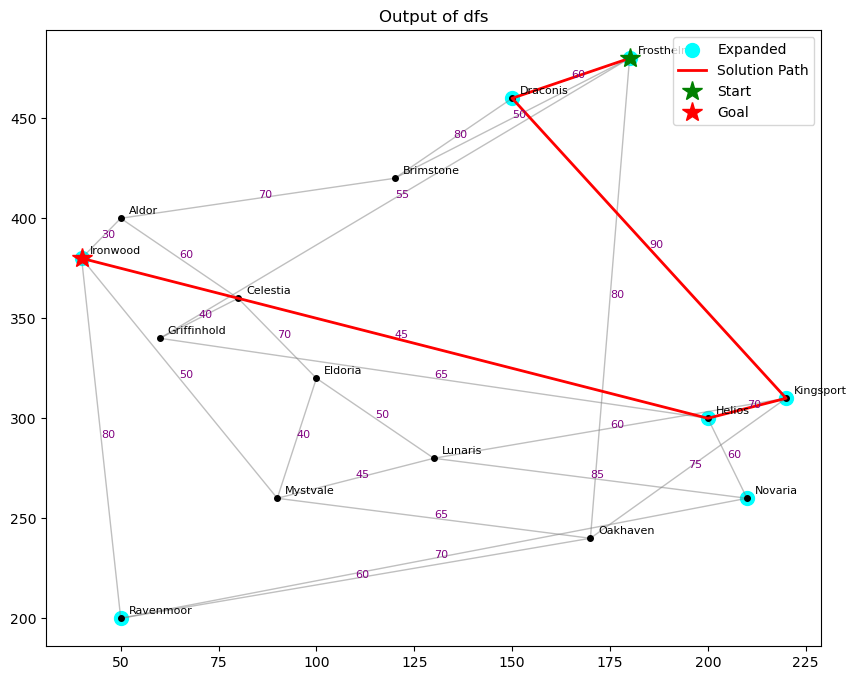


Greedy Best-First Search:
Path: Frosthelm -> Griffinhold -> Celestia -> Aldor -> Ironwood
Total cost: 185


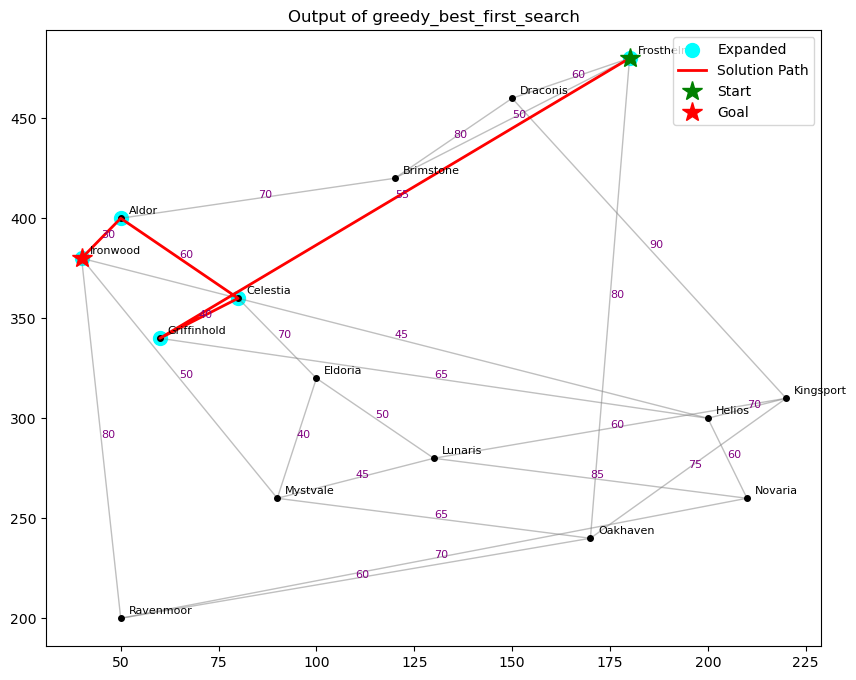


A* Search:
Path: Frosthelm -> Brimstone -> Aldor -> Ironwood
Total cost: 150


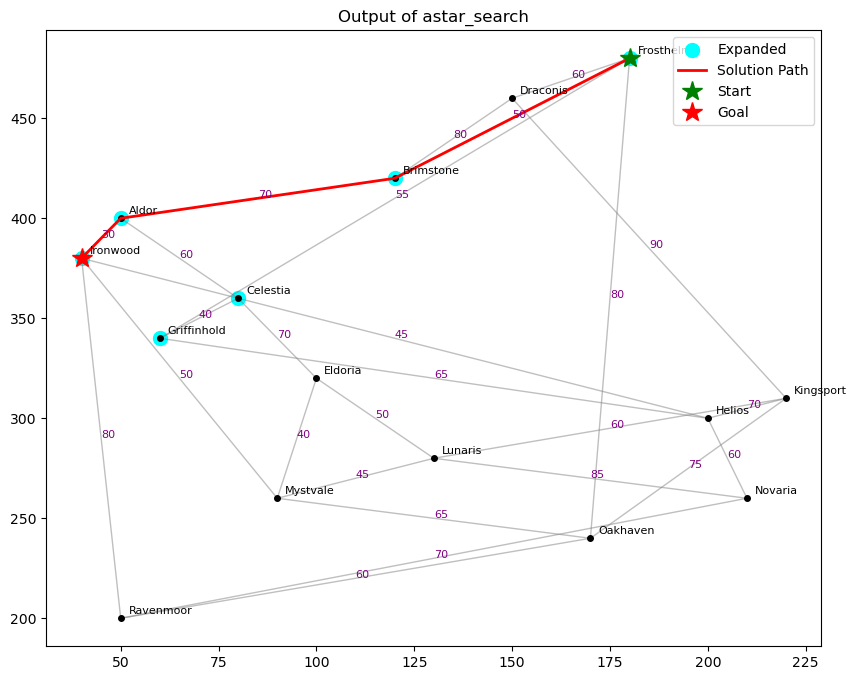


Weighted A* Search:
Path: Frosthelm -> Brimstone -> Aldor -> Ironwood
Total cost: 150


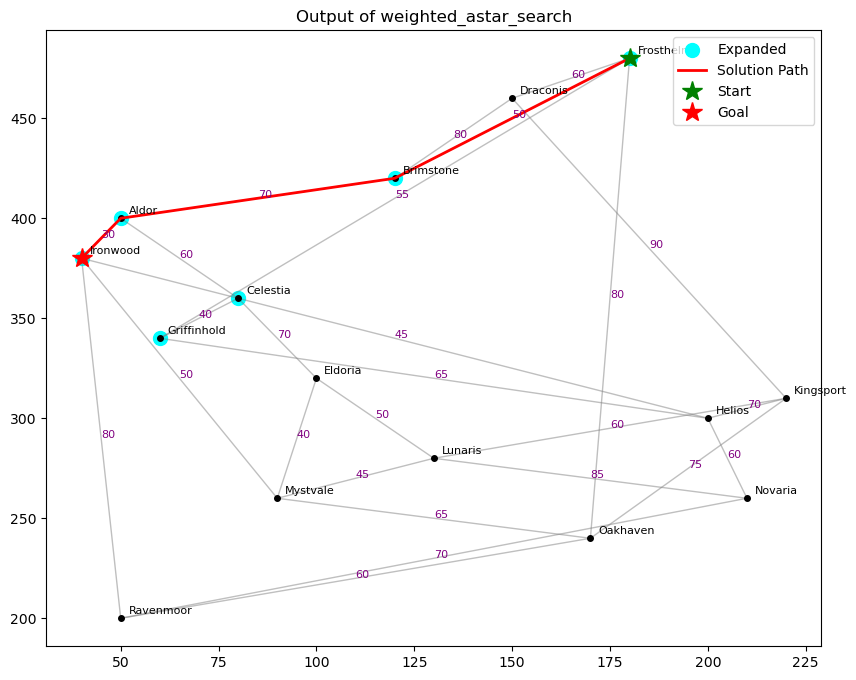

In [16]:

#Cell ID 3
#DON'T EDIT
# Runs the map specified in the 'search_config' dictionary with the designated start and goal nodes.
# It applies all search algorithms listed in the 'algorithms' dictionary.
#
# The 'search_config' dictionary contains:
#   - 'map': the map to use (e.g., romania_map),
#   - 'start': the starting node (e.g., "Arad"),
#   - 'goal': the goal node (e.g., "Bucharest").
#
# The 'algorithms' dictionary maps human-readable algorithm names to their corresponding search functions.
#
# The function 'solve_and_plot_route_problem' does the following:
#   1. Creates a RouteProblem instance using the start, goal, and map provided in search_config.
#   2. Iterates over each search function in the algorithms dictionary.
#   3. For each algorithm, it runs the search on the same problem instance.
#   4. If a solution is found, it prints the solution path and total cost.
#   5. It then calls plot_map() to visualize (static)
#
# The code below runs all configured algorithms on the RouteProblem and displays the results.


search_config=dict(
    #map = romania_map,
    #start = "Arad",
    #goal = "Bucharest")
    map = fantasy_map, 
    start = "Frosthelm", 
    goal = "Ironwood")

algorithms = {
    "Breadth-First Search": bfs,
    "Depth-First Search": dfs,
    "Greedy Best-First Search": greedy_best_first_search,
    "A* Search": astar_search,
    "Weighted A* Search": weighted_astar_search
}

def solve_and_plot_route_problem(search_configuration, algorithms):
    rp = RouteProblem(search_configuration.get("start"), search_configuration.get("goal"), search_configuration.get("map"))
    # Loop over the search functions and run each on the same problem 'rp'
    for name, search_fn in algorithms.items():
        solution,expanded_nodes = search_fn(rp)
        if solution:
            sol_path = path_states(solution)
            print(f"\n{name}:")
            print("Path:", " -> ".join(sol_path))
            print("Total cost:", solution.path_cost)
            # Use f-string to display the function name in the title
            plot_map(rp.map, solution=sol_path, expanded=expanded_nodes, title=f"Output of {search_fn.__name__}")
        else:
            print(f"No solution found using {name}.")


solve_and_plot_route_problem(search_config, algorithms)



BFS  Search:
Path: Arad -> Sibiu -> Fagaras -> Bucharest
Total cost: 450


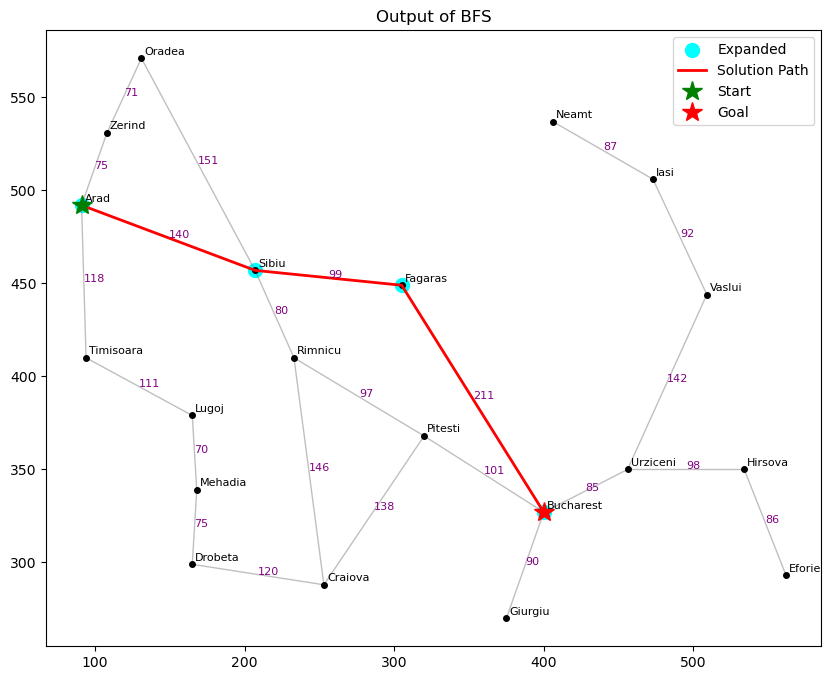

In [7]:
#Cell ID 4
# You can Test In here
# Test BFS separately without using the 'solve_and_plot_route_problem' function
# Just to show you how you can run just one algorithm on a map -- to help your tests

rp = RouteProblem("Arad", "Bucharest", romania_map)
#solution,explanded_nodes = bfs(rp)
#solution, explanded_nodes= dfs(rp)
#solution, explanded_nodes = uniform_cost_search(rp)
#solution, explanded_nodes = greedy_best_first_search(rp)
solution, explanded_nodes = weighted_astar_search(rp)
if solution:
    sol_path = path_states(solution)
    print("BFS  Search:")
    print("Path:", " -> ".join(sol_path))
    print("Total cost:", solution.path_cost)
    # Use f-string to display the function name in the title
    plot_map(rp.map, solution=sol_path, expanded=explanded_nodes, title="Output of BFS")
else:
    print(f"No solution found using BFS.")


In [8]:
# Cell ID 5
# You can use this function to calculate heuristic values for any map with any goal
def compute_heuristic_distances(goal, map):
    """
    Compute the heuristic (Euclidean) distance from each state to the goal state.

    Args:
        goal (str): The goal state (e.g., "Bucharest").
        locations (dict): A dictionary mapping state names to (x, y) coordinates.
        
    Returns:
        dict: A dictionary mapping each state to its Euclidean distance from the goal.
    """
    locations = map.locations
    if goal not in locations:
        raise ValueError(f"Goal state '{goal}' not found in locations dictionary.")
    
    goal_x, goal_y = locations[goal]
    distances = {}
    for state, (x, y) in locations.items():
        distances[state] = math.hypot(goal_x - x, goal_y - y)
    return distances



# For example, compute the heuristic distances to Bucharest:
goal = "Bucharest"
distances_to_goal = compute_heuristic_distances(goal, romania_map)
for state, distance in distances_to_goal.items():
    print(f"Distance from {state} to {goal}: {distance:.2f}")


Distance from Arad to Bucharest: 350.29
Distance from Bucharest to Bucharest: 0.00
Distance from Craiova to Bucharest: 152.09
Distance from Drobeta to Bucharest: 236.66
Distance from Eforie to Bucharest: 165.53
Distance from Fagaras to Bucharest: 154.63
Distance from Giurgiu to Bucharest: 62.24
Distance from Hirsova to Bucharest: 135.96
Distance from Iasi to Bucharest: 193.31
Distance from Lugoj to Bucharest: 240.68
Distance from Mehadia to Bucharest: 232.31
Distance from Neamt to Bucharest: 210.09
Distance from Oradea to Bucharest: 363.18
Distance from Pitesti to Bucharest: 89.89
Distance from Rimnicu to Bucharest: 186.49
Distance from Sibiu to Bucharest: 232.70
Distance from Timisoara to Bucharest: 317.06
Distance from Urziceni to Bucharest: 60.54
Distance from Vaslui to Bucharest: 159.91
Distance from Zerind to Bucharest: 356.20


<!-- ## Homework Exercises

1. **Implement Iterative Deepening Search (IDS):**  
   Write a function that repeatedly calls depth-limited search with increasing limits until a solution is found.

2. **Weighted A* Search:**  
   Modify the A* search function to accept a weight parameter (w ≥ 1) so that `f(n) = g(n) + w · h(n)`. Compare the solutions for different weights.

3. **Alternate Heuristic Functions:**  
   For the `GraphProblem`, try replacing the Euclidean heuristic with the Manhattan distance (adjust positions if needed). How does this affect performance?

4. **Expand the Domain:**  
   Extend the `GraphProblem` class to support undirected graphs (by adding reverse edges) and try solving a problem with multiple goal states. -->

## How about we vizualize the search flow in real-time?

Solution Path: Arad -> Sibiu -> Rimnicu -> Pitesti -> Bucharest
Total cost: 418
Animation complete.


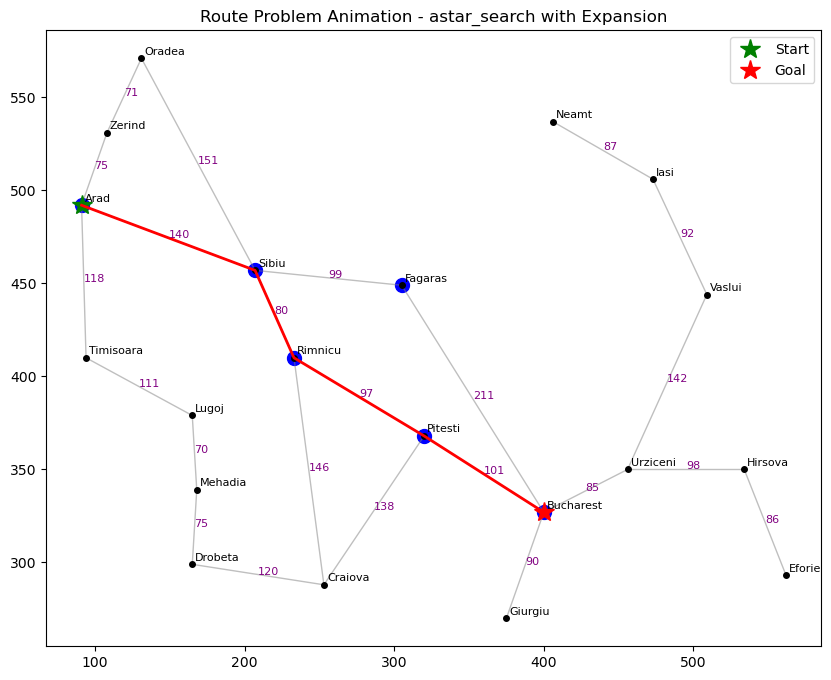

In [9]:
#Cell ID 6
'''
This is OPTIONAL (but fun if runs properly)
If it crashes your notebook that means the backend is not supporded. 
In that case restart the Kernel and do not run it.

In the 'animate_route_problem_with_expansion' function provide a routeProblem, map, an algorithm function and a pause_time (time gap between each expansion)
This will show you the expansion of nodes with stepwise animation!
'''
# --------------------
# Run the Animation
# --------------------
rp = RouteProblem("Arad", "Bucharest", romania_map)
animate_route_problem_with_expansion(rp, romania_map,astar_search, pause_time=800)
